In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import  os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import  accuracy_score
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import kmeans, vq

DATA_PATH= os.path.join('../data', 'dow_jones_index.data')

### Load data file and call info() function to df

In [2]:
df = pd.read_csv(DATA_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

### Head of Dataframe

In [3]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


### The amount of NaA values in columns

In [4]:
df.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [5]:
# preprocessing. Conversion all values to numerical data type
df['open'] = df['open'].str.replace('$', '')
df['close'] = df['close'].str.replace('$', '')
df['high'] = df['high'].str.replace('$', '')
df['low'] = df['low'].str.replace('$', '')
df['next_weeks_open'] = df['next_weeks_open'].str.replace('$', '')
df['next_weeks_close'] = df['next_weeks_close'].str.replace('$', '')

df['open'] = df['open'].astype('float')
df['close'] = df['close'].astype('float')
df['high'] = df['high'].astype('float')
df['low'] = df['low'].astype('float')
df['next_weeks_open'] = df['next_weeks_open'].astype('float')
df['next_weeks_close'] = df['next_weeks_close'].astype('float')

df_without_nan = df.fillna(0)

### Dataframe info after conversion af all values to numerical types

In [6]:
print(df_without_nan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    float64
 4   high                                750 non-null    float64
 5   low                                 750 non-null    float64
 6   close                               750 non-null    float64
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  750 non-null    float64
 10  previous_weeks_volume               750 non-null    float64
 11  next_weeks_open                     750 non-n

### Amount of rows with each value in 'stock' column

In [7]:
df_without_nan.stock.value_counts()

HPQ     25
XOM     25
TRV     25
MCD     25
WMT     25
MMM     25
BA      25
INTC    25
GE      25
JPM     25
T       25
HD      25
PFE     25
IBM     25
AA      25
CVX     25
MSFT    25
UTX     25
BAC     25
KO      25
VZ      25
DIS     25
CSCO    25
AXP     25
CAT     25
MRK     25
KRFT    25
DD      25
JNJ     25
PG      25
Name: stock, dtype: int64

### Dataframe without 'stock' and 'date' columns

In [8]:
# make arrays with labels and dates and df_work withóut both of them

labels=df['stock']
df_work=df_without_nan.copy(deep=True)
df_work.drop('stock', inplace=True, axis=1)
dates=df_work.drop('date', inplace=True, axis=1)
df_work.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,15.82,16.72,15.78,16.42,239655616,3.79267,0.000000,0.0,16.71,15.97,-4.428490,26,0.182704
1,1,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [9]:
# create array with encoded labels
labels_reshaped = np.array(labels).reshape(-1, 1)

ord_encoder=OrdinalEncoder()
labels_encoded=ord_encoder.fit_transform(labels_reshaped)

### DecisionTreeClassifier model with accuracy score

In [10]:
dt =DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(df_work, labels_encoded, random_state=42, test_size=0.3)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

print('Accuracy score of decision tree classifier: {:.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score of decision tree classifier: 0.9333


### Plot a Dendrogram to Hierarchical clustering model

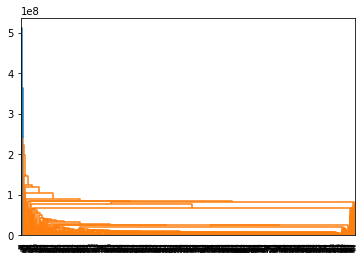

In [11]:
distance_matrix=linkage(df_work)
dn=dendrogram(distance_matrix)

### Elbow plot for kmeans model

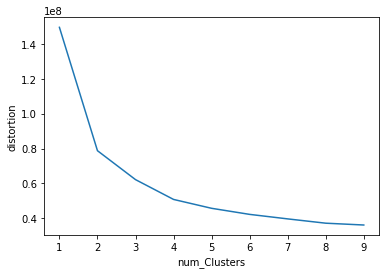

In [12]:
distortions=[]
num_clusters=range(1,10)

for i in num_clusters:
    cluster_center, distortion = kmeans(df_work, i)
    distortions.append(distortion)

df_for_kmeans=pd.DataFrame({'num_Clusters':num_clusters, 'distortion':distortions})

sns.lineplot(x='num_Clusters', y='distortion', data=df_for_kmeans)
plt.show()

In [13]:
# For future models
'''
cluster_center, _ = kmeans(df_work, 4)
df_work['cluster_label'], distortions_list = vq(df_work, cluster_center)
'''


"\ncluster_center, _ = kmeans(df_work, 4)\ndf_work['cluster_label'], distortions_list = vq(df_work, cluster_center)\n"

In [15]:
model_tsne=TSNE(learning_rate=200)
tsne_features=model_tsne.fit_transform(df_work)

